 Dataset head::
    YearsExperience     Salary
0              8.1   77884.67
1             19.1  127213.68
2             14.9  103343.52
3             12.4   88988.96
4              4.0   35214.78
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  50 non-null     float64
 1   Salary           50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes

Dataset info::
 None

Descriptive Statistics::
        YearsExperience        Salary
count        50.000000      50.00000
mean          9.480000   77370.54740
std           5.485491   28298.92442
min           1.400000   33048.80000
25%           4.500000   53861.88000
50%           9.300000   78598.65000
75%          13.350000   95356.22500
max          19.400000  140646.44000


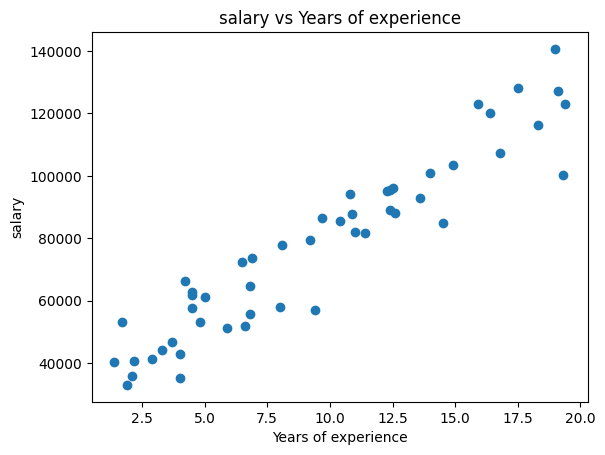

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


#1 Loading the dataset(For a note - I have uploaded the extended_salary_data.csv file to my google collab and then used that path for carrying )
url="/content/extended_salary_data (1).csv"
data=pd.read_csv(url)

#basic statistics
print(" Dataset head::\n",data.head())
print("\nDataset info::\n",data.info())
print("\nDescriptive Statistics::\n",data.describe())


#visulizing the data by scatter plot
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Years of experience')
plt.ylabel('salary')
plt.title('salary vs Years of experience')
plt.show()

In [20]:
#Computing the basic statistics
print(data.describe)

<bound method NDFrame.describe of     YearsExperience     Salary  NumProjectsCompleted
0               8.1   77884.67             17.193428
1              19.1  127213.68             37.923471
2              14.9  103343.52             31.095377
3              12.4   88988.96             27.846060
4               4.0   35214.78              7.531693
5               4.0   42801.56              7.531726
6               2.1   35893.61              7.358426
7              17.5  128071.22             36.534869
8              12.4   95436.18             23.861051
9              14.5   84869.60             30.085120
10              1.4   40240.84              1.873165
11             19.4  123149.18             37.868540
12             16.8  107230.78             34.083925
13              5.0   61116.76              6.173440
14              4.5   62810.00              5.550164
15              4.5   61812.80              7.875425
16              6.8   55607.82             11.574338
17          

In [13]:
#spliting the data into training and testing sets (80% train,20%test)
X=data[['YearsExperience']]
Y=data['Salary']
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [14]:
#Linear Regression Model
Model=LinearRegression()
Model.fit(X_Train,Y_Train)


LinearRegression()

In [15]:
#Obtaining the slope and interecepts(coefficients)
slope=Model.coef_[0]
intercept=Model.intercept_
print(f"Linear Regression Model:Y={slope:.2f}*X +{intercept:.2f}")
Y_pred=Model.predict(X_Test)#prediction on test set


Linear Regression Model:Y=4854.18*X +31387.44


In [16]:
#Evaluation metrics
mae=mean_absolute_error(Y_Test,Y_pred)
mse=mean_squared_error(Y_Test,Y_pred)
print(f"Mean Absolute Error:{mae:.2f}")
print(f"Mean Squared Error:{mse:.2f}")


Mean Absolute Error:6836.21
Mean Squared Error:79580620.27


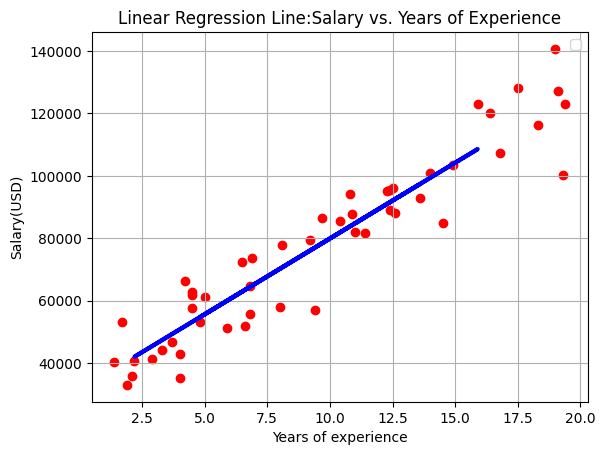

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data['YearsExperience'],data['Salary'],color='red')
plt.plot(X_Test,Y_pred,color='blue',linewidth=3)
plt.xlabel('Years of experience')
plt.ylabel('Salary(USD)')
plt.grid(True)
plt.legend()
plt.title('Linear Regression Line:Salary vs. Years of Experience')
plt.show()

In [18]:
#BONOUS
#adding synthetic feature "Number of projects Completed"
np.random.seed(42)
data['NumProjectsCompleted']=data['YearsExperience']*2 +np.random.randn(len(data))*2


#train-test split for multiple linear regression
X_multiple=data[['YearsExperience','NumProjectsCompleted']]
X_Train_multi,X_Test_multi,Y_Train_multi,Y_Test_multi=train_test_split(X_multiple,Y,test_size=0.2,random_state=42)


#train multiple linear regression model
Multi_model=LinearRegression()
Multi_model.fit(X_Train_multi,Y_Train_multi)


#evaluating and predicting
Y_pred_multi=Multi_model.predict(X_Test_multi)
mae_multi=mean_absolute_error(Y_Test_multi,Y_pred_multi)
mse_multi=mean_squared_error(Y_Test_multi,Y_pred_multi)

print(f"Multiple Regression Model MAE: {mae_multi:.2f}")
print(f"Multiple Regression Model MSE: {mse_multi:.2f}")



Multiple Regression Model MAE: 6587.41
Multiple Regression Model MSE: 75771513.18


In [19]:
#comparing SimplelinearRegression and MultiplelinearRegression
print("\nComparison of MAE and MSE:")
print(f"Simple Linear Regression MAE:{mae:.2f},MSE:{mse:.2f}")
print(f"Multiple Linear Regression MAE:{mae_multi:.2f},MSE:{mse_multi:.2f}")


Comparison of MAE and MSE:
Simple Linear Regression MAE:6836.21,MSE:79580620.27
Multiple Linear Regression MAE:6587.41,MSE:75771513.18
